In [10]:
from transformers import BeitFeatureExtractor, BeitForImageClassification
from PIL import Image
import requests
import torch
import matplotlib.pyplot as plt

# Descargar y cargar una imagen de prueba
image_url = "https://upload.wikimedia.org/wikipedia/commons/2/2d/Street_view_in_New_York_City.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)

# Mostrar la imagen cargada
plt.imshow(image)
plt.axis("off")
plt.show()

# Cargar el modelo pre-entrenado (no necesita API, se descarga localmente)
feature_extractor = BeitFeatureExtractor.from_pretrained("microsoft/beit-base-patch16-224-pt22k-ft22k")
model = BeitForImageClassification.from_pretrained("microsoft/beit-base-patch16-224-pt22k-ft22k")

# Convertir la imagen para el modelo
inputs = feature_extractor(images=image, return_tensors="pt")

# Hacer la predicción
with torch.no_grad():
    logits = model(**inputs).logits

# Obtener la etiqueta más probable
predicted_label = logits.argmax(-1).item()

# Etiquetas del modelo (puede que el modelo no esté entrenado específicamente en NSFW, pero detecta conceptos generales)
labels = model.config.id2label
print(f"Predicción de la imagen: {labels[predicted_label]}")


ConnectionError: HTTPSConnectionPool(host='upload.wikimedia.org', port=443): Max retries exceeded with url: /wikipedia/commons/2/2d/Street_view_in_New_York_City.jpg (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002477807F6E0>: Failed to resolve 'upload.wikimedia.org' ([Errno 11001] getaddrinfo failed)"))

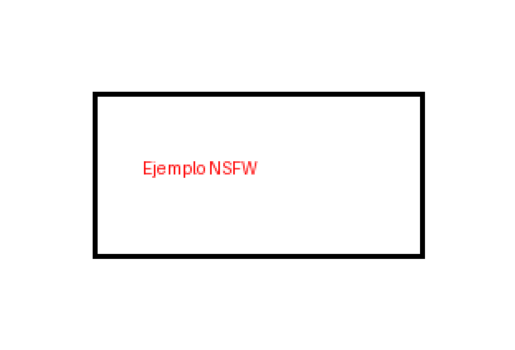

✅ Imagen generada y guardada como 'example.jpg'


preprocessor_config.json:   0%|          | 0.00/276 [00:00<?, ?B/s]

C:\Users\jenny\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\jenny\.cache\huggingface\hub\models--microsoft--beit-base-patch16-224-pt22k-ft22k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
C:\Users\jenny\anaconda3\Lib\site-packages\transformers\models\beit\feature_extraction_beit.py:28: F

config.json:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/414M [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.hf.co/microsoft/beit-base-patch16-224-pt22k-ft22k/c8caca90c227d6f47eb56be6b6ca0b10b6c28ddbfc821ac518651c574d91d4b0?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27pytorch_model.bin%3B+filename%3D%22pytorch_model.bin%22%3B&response-content-type=application%2Foctet-stream&Expires=1739632420&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczOTYzMjQyMH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9taWNyb3NvZnQvYmVpdC1iYXNlLXBhdGNoMTYtMjI0LXB0MjJrLWZ0MjJrL2M4Y2FjYTkwYzIyN2Q2ZjQ3ZWI1NmJlNmI2Y2EwYjEwYjZjMjhkZGJmYzgyMWFjNTE4NjUxYzU3NGQ5MWQ0YjA%7EcmVzcG9uc2UtY29udGVudC1kaXNwb3NpdGlvbj0qJnJlc3BvbnNlLWNvbnRlbnQtdHlwZT0qIn1dfQ__&Signature=IVTmLZLgQh0GAibTY0mIao-7WjFJ8h2L-ZtGpqlib3Y5YIvdBKIikWl5jHzuHn3EgMPWnc42yv8T0jKdMhsnG4MRannGsOXvo4RambMDsYF4Vw3-vlTYY%7EqzV6ZlezQeRLMMbUJwnjHfDEnyDqDhJg%7EJ0gxoGucFfQahcTJ8NReM8x2BHo08o92A9RPDs85Y9q8RNuC-UElwvUavL4al1hXtGOIMep%7ET-Hzk6N62etGJ2ZwET3EO0rPPh8FDYCE3Z

ConnectionError: (MaxRetryError('HTTPSConnectionPool(host=\'cdn-lfs.hf.co\', port=443): Max retries exceeded with url: /microsoft/beit-base-patch16-224-pt22k-ft22k/c8caca90c227d6f47eb56be6b6ca0b10b6c28ddbfc821ac518651c574d91d4b0?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27pytorch_model.bin%3B+filename%3D%22pytorch_model.bin%22%3B&response-content-type=application%2Foctet-stream&Expires=1739632420&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczOTYzMjQyMH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9taWNyb3NvZnQvYmVpdC1iYXNlLXBhdGNoMTYtMjI0LXB0MjJrLWZ0MjJrL2M4Y2FjYTkwYzIyN2Q2ZjQ3ZWI1NmJlNmI2Y2EwYjEwYjZjMjhkZGJmYzgyMWFjNTE4NjUxYzU3NGQ5MWQ0YjA~cmVzcG9uc2UtY29udGVudC1kaXNwb3NpdGlvbj0qJnJlc3BvbnNlLWNvbnRlbnQtdHlwZT0qIn1dfQ__&Signature=IVTmLZLgQh0GAibTY0mIao-7WjFJ8h2L-ZtGpqlib3Y5YIvdBKIikWl5jHzuHn3EgMPWnc42yv8T0jKdMhsnG4MRannGsOXvo4RambMDsYF4Vw3-vlTYY~qzV6ZlezQeRLMMbUJwnjHfDEnyDqDhJg~J0gxoGucFfQahcTJ8NReM8x2BHo08o92A9RPDs85Y9q8RNuC-UElwvUavL4al1hXtGOIMep~T-Hzk6N62etGJ2ZwET3EO0rPPh8FDYCE3Zw16q8ItxnK6spOFN42J9Crh9k-pkF~WP8n0qxNdtEQK74TljdL9vkRpKuOr8awklQtwLQ4agVhUgmoBxD7ZDQ__&Key-Pair-Id=K3RPWS32NSSJCE (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002477BD1A870>: Failed to resolve \'cdn-lfs.hf.co\' ([Errno 11001] getaddrinfo failed)"))'), '(Request ID: 1272646a-c527-4c85-b1ce-7ff385babda0)')

In [12]:
# Importar librerías necesarias
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import torch
from transformers import BeitFeatureExtractor, BeitForImageClassification

# 📌 1️⃣ Generar una imagen localmente
width, height = 300, 200  # Tamaño de la imagen
image = Image.new("RGB", (width, height), "white")  # Crear imagen en blanco
draw = ImageDraw.Draw(image)
draw.rectangle([50, 50, 250, 150], outline="black", width=3)  # Dibujar un rectángulo
draw.text((80, 90), "Ejemplo NSFW", fill="red")  # Agregar un texto de prueba

# Guardar la imagen generada
image_path = "example.jpg"
image.save(image_path)

# 📌 2️⃣ Mostrar la imagen generada
plt.imshow(image)
plt.axis("off")  # Ocultar los ejes
plt.show()

print(f"✅ Imagen generada y guardada como '{image_path}'")

# 📌 3️⃣ Cargar el modelo de detección NSFW gratuito
feature_extractor = BeitFeatureExtractor.from_pretrained("microsoft/beit-base-patch16-224-pt22k-ft22k")
model = BeitForImageClassification.from_pretrained("microsoft/beit-base-patch16-224-pt22k-ft22k")

# 📌 4️⃣ Cargar la imagen generada para su análisis
image = Image.open(image_path)

# Convertir la imagen para el modelo
inputs = feature_extractor(images=image, return_tensors="pt")

# 📌 5️⃣ Hacer la predicción
with torch.no_grad():
    logits = model(**inputs).logits

# Obtener la etiqueta más probable
predicted_label = logits.argmax(-1).item()

# 📌 6️⃣ Mostrar la predicción
labels = model.config.id2label  # Obtener etiquetas del modelo
print(f"🔍 Predicción de la imagen: {labels[predicted_label]}")
